In [100]:
import pandas as pd
import numpy as np
import datetime
import ipywidgets 
import matplotlib.pyplot as plt
import time

In [26]:
from ipywidgets import widgets
from IPython import display

In [27]:
data_dir = r"./transport/"

In [28]:
transport = pd.read_pickle(data_dir + r"transport.pkl")
temperatures = pd.read_pickle(data_dir + r"temperatures.pkl")

In [29]:
temperatures.sample(10)

,TransportID,Time_raw,TemperatureInternal,TemperatureExternal,Time
48902,7886,Sat Sep 10 10:27:26 CEST 2016,5.2,3.9,2016-09-10 08:27:26
143191,8747,Fri Sep 15 10:21:55 CEST 2017,20.9,20.3,2017-09-15 08:21:55
179604,9102,Sun Dec 31 22:20:47 CET 2017,16.2,17.1,2017-12-31 21:20:47
113660,8512,Fri Jun 23 12:50:59 CEST 2017,5.3,3.7,2017-06-23 10:50:59
205578,9203,Sat Dec 23 00:15:27 CET 2017,17.3,22.7,2017-12-22 23:15:27
141871,8744,Wed Sep 13 19:54:14 CEST 2017,21.4,21.8,2017-09-13 17:54:14
64559,8246,Mon Jan 23 21:08:26 CET 2017,3.7,4.6,2017-01-23 20:08:26
178222,9101,Thu Dec 21 08:10:47 CET 2017,8.6,11.0,2017-12-21 07:10:47
184612,9113,Fri Dec 15 15:44:53 CET 2017,17.3,15.8,2017-12-15 14:44:53
79109,8307,Mon Feb 20 08:45:52 CET 2017,22.1,17.2,2017-02-20 07:45:52


In [91]:
?widgets.Dropdown

In [168]:
# A lot to improve:
# - create figure only once, replot the graph instead
# - filling of missing time values: what is wrong here?
# - Display of transport info in 2nd plot
# - Time Format

class TransportViewer(object):
    def __init__(self):
        ''' 
        
        '''
        more_than_0counts = temperatures.groupby('TransportID').count().Time >0
        self.transport_ids = list(more_than_0counts[more_than_0counts].index)
        
    def launch(self):        
        self._create_transport_select_widget()
        # self._create_slicewidget()

    def _create_transport_select_widget(self):
        self._transportwgt=widgets.Dropdown(description='Transport ID',
                                            options=self.transport_ids) 
        display.display(self._transportwgt)
        self._transportwgt.observe(self.show_transport,
                                            names='value') # NB! names='value'. Listen only to value       
        
#     def _create_slicewidget(self):
#         max_val=self.img.shape[self.axis]
#         self._slider=widgets.IntSlider(description='slice index', min=0,max=max_val-1)
#         display.display(self._slider)
#         self._slider.observe(self.show_slice)
        
    def show_transport(self, btn):
        display.clear_output()
        plt.close('all')
        self.fig, self.axs = plt.subplots(1, 2, figsize=(12, 5))
        self.transportid = int(self._transportwgt.value)

        print(self.transportid)
        #update the slicewidget max value
        selected_idx = temperatures.loc[:, 'TransportID']==self.transportid
        temps_tmp = temperatures.loc[selected_idx,:]
        temps_tmp.loc[:, 'Time'] = temps_tmp.loc[:, 'Time'].fillna(method='bfill') 
        temps_tmp.loc[:, 'Time'] = temps_tmp.loc[:, 'Time'].fillna(method='ffill')
        try:
            
            temps_tmp.plot(x='Time', y=['TemperatureInternal','TemperatureExternal'], ax=self.axs[0])
            plt.show()     
        except Exception as e:
            print(e)
            print('Something wrong')
        # print(temps_tmp)
        #plt.draw()

7213


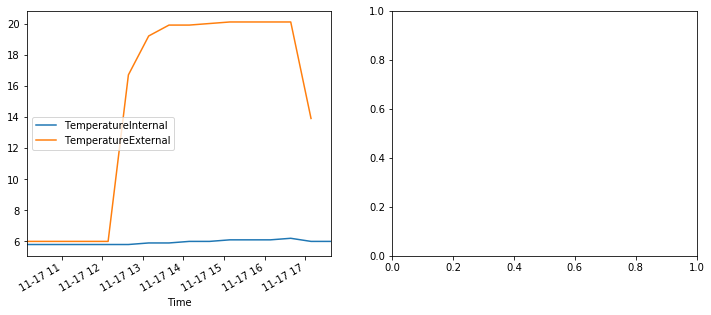

In [169]:
tp = TransportViewer()
tp.launch()